In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [110]:
balloons_img = cv2.imread("img/perceptual-standard.jpg")
balloons_img = cv2.cvtColor(balloons_img, cv2.COLOR_BGR2RGB)
dnc_img = cv2.imread("img/do_not_copy.png")
dnc_img = cv2.cvtColor(dnc_img, cv2.COLOR_BGR2RGB)

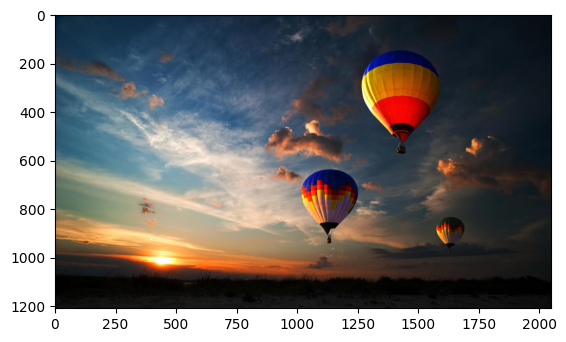

In [111]:
plt.imshow(balloons_img)

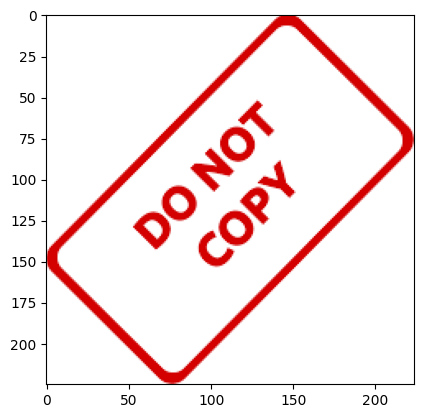

In [112]:
plt.imshow(smile_img)

In [113]:
balloons_img.shape

(1210, 2048, 3)

In [114]:
dnc_img.shape

(225, 224, 3)

In [116]:
x_offset = 2048 - 224
y_offset = 1210 - 225

In [117]:
rows, cols, channels = smile_img.shape

In [118]:
roi = balloons_img[y_offset:1210, x_offset:2048]

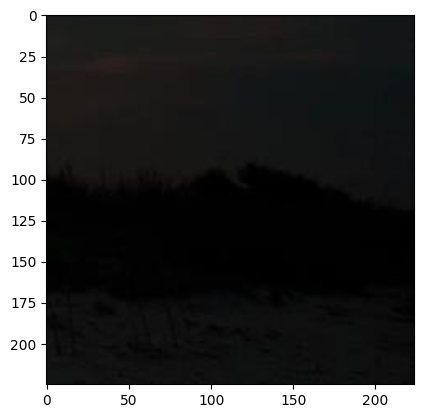

In [119]:
plt.imshow(roi)

In [121]:
dnc_img_gray = cv2.cvtColor(dnc_img, cv2.COLOR_RGB2GRAY)

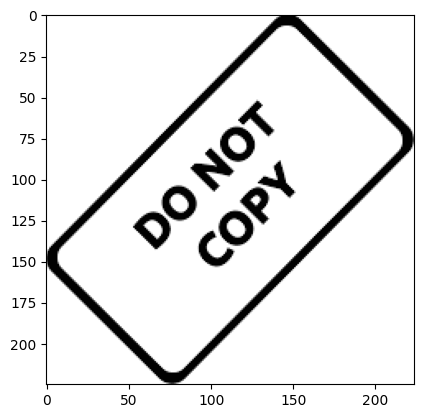

In [122]:
plt.imshow(dnc_img_gray, cmap="gray")

In [123]:
dnc_img_gray_mask_inv = cv2.bitwise_not(dnc_img_gray)

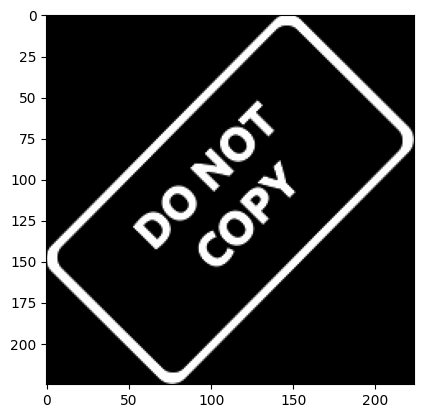

In [124]:
plt.imshow(dnc_img_gray_mask_inv, cmap="gray")

In [125]:
dnc_img_gray_mask_inv.shape

(225, 224)

In [126]:
white_bg = np.full(dnc_img.shape, 255, dtype=np.uint8)

In [127]:
white_bg.shape

(225, 224, 3)

In [128]:
bg = cv2.bitwise_or(white_bg, white_bg, mask=dnc_img_gray_mask_inv)

In [129]:
bg.shape

(225, 224, 3)

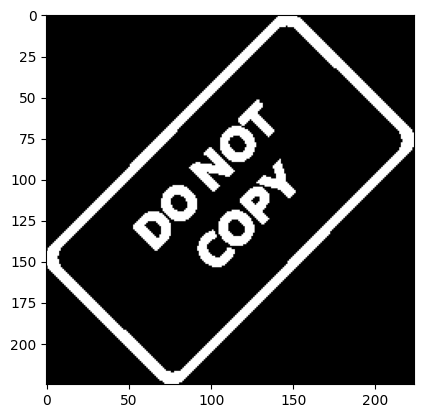

In [130]:
plt.imshow(bg)

In [132]:
fg = cv2.bitwise_or(dnc_img, dnc_img, mask=dnc_img_gray_mask_inv)

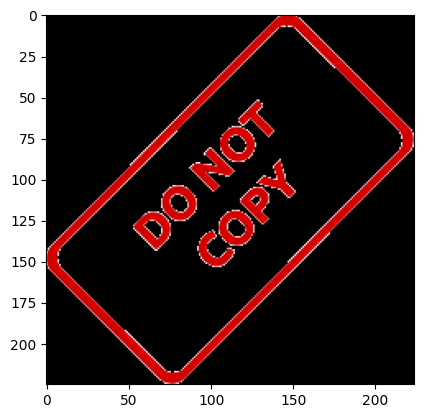

In [133]:
plt.imshow(fg)

In [134]:
final_roi = cv2.bitwise_or(roi, fg)

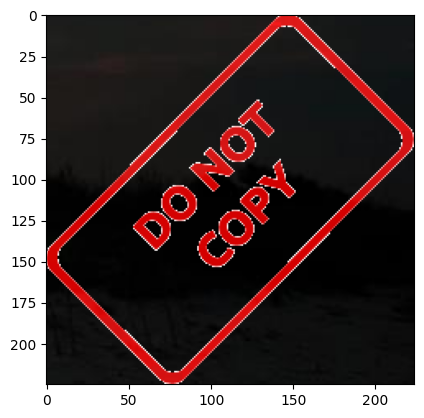

In [135]:
plt.imshow(final_roi)

In [136]:
balloons_img_copy = balloons_img.copy()

In [137]:
balloons_img_copy[y_offset:y_offset+dnc_img.shape[0], x_offset:x_offset+dnc_img.shape[1]] = final_roi

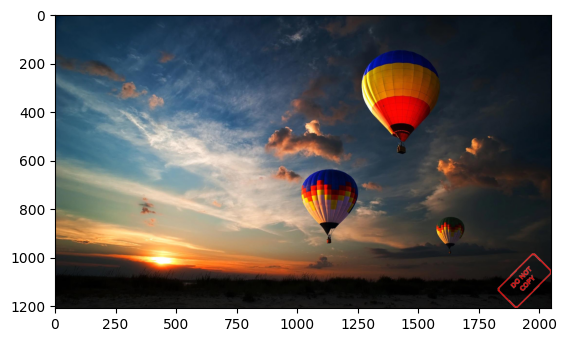

In [138]:
plt.imshow(balloons_img_copy)